#Clustering K-means

En esta notebook vamos a explorar un metodo de clusterización visto en la clase teórica. El método de clusterización que veremos corresponde a la rama de ML de aprendizaje no supervisado donde la idea principal es encontrar grupos en los datos que sean similares a otros datos del mismo grupo y lo menos similar posible a datos en otros.

El método es el algoritmo de partición **K-Means**, que aplicaremos al dataset de caras Olivetti, para tratar de agrupar las fotos según la persona a la que se le sacó la foto.

In [ ]:
# importamos las librerías usuales de python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importamos los algoritmos de clusterizacion a utilizar en esta notebook
from sklearn.cluster import KMeans                    # K-means

## [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

El método de clusterización "K-Means" busca encontrar *k* clusters de modo tal que se minimice la varianza intra-cluster medida, usualmente, como el cuadrado de la distancia euclídea. Para ello el algoritmo empieza encontrando *k centroids* y le asigna a cada sample la etiqueta correspondiente a la del centroid más cercano. Una vez actualizadas las etiquetas de todas las samples, calcula la posición de los k centroids (como el promedio de las features de las samples de cada cluster) y vuelve a asignar etiquetas a cada sample de acuerdo a la distancia al centroid más cercano. Hace estos dos pasos hasta que no haya más cambios de etiqueta.

Debido a esta inicialización aleatoria de los k centroids el output del modelo puede variar al aplicarlo otra vez a la misma data. Por ello se repite este procedimiento n_init=10 veces y el output final es el que mejor resultado tuvo al minimizar la función objetivo (varianza intra-cluster).

### Clustering en el dataset de caras Olivett

El dataset consta de 10 fotos de 64*64 pixeles en escala de grises de 40 personas distintas (400 fotos en total). Cada sample (foto) importada es un vector de 4096 elementos, los cuales representan las filas de pixeles ordenadas de arriba hacia abajo de la foto. Es decir, los primeros 64 elementos corresponden a la fila superior de pixeles de la imagen y así sucesivamente.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces # para cargar el dataset de caras
data, targets = fetch_olivetti_faces(return_X_y = True) # cargamos las caras

print('Dimensión de los datos {}'.format(data.shape))

Dimensión de los datos (400, 4096)


Gráficamos las imágenes, pero de solo 2 dimensiones. Puede jugar con cuales dimensiones gráficar.

Text(0, 0.5, 'Segunda dimensión')

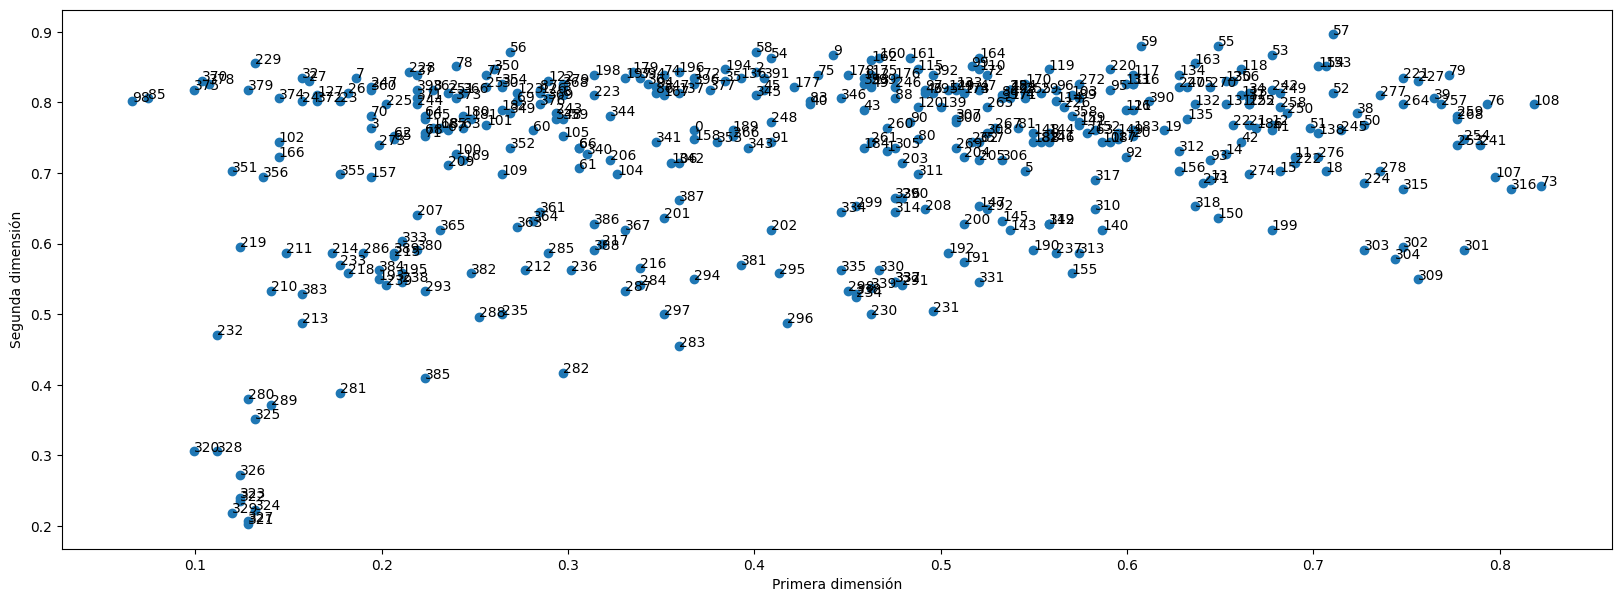

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# dimensiones
d1 = 1
d2 = 30

# Hacemos un scatter plot de cada uno de los datos de las 2 primeras dimensiones
ax.scatter(data[:, d1], data[:, d2])

# Por cada dato escribimos a qué instancia corresponde
for i in range(data.shape[0]):
  ax.text(data[i, d1], data[i, d2], s = i)

ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')

Ahora aplicamos el método de clusterización K-Means para agrupar las fotos en base a sus componentes principales. Como sabemos que el dataset consta de 40 personas diferentes utilizamos esta información para pedirle al algoritmo que encuentre k=40 clusters con la esperanza que podamos agrupar las fotos según la persona que está en ella.

In [ ]:
# Creación del modelo KMeans con k = 40
kmeans = KMeans(n_clusters=40)

# Ajuste del modelo a los datos reducidos en componentes principales
kmeans.fit(data)

KMeans(n_clusters=40)

Para acceder a las etiquetas que le asignó el modelo a cada sample usamos 'kmeans.labels_'

In [ ]:
# Nos fijamos las etiquetas asignadas a las primeras 10 muestras y los counts que recibió cada una
np.unique(kmeans.labels_[:10], return_counts=True)

(array([10, 15, 20, 31, 37, 38], dtype=int32), array([1, 3, 2, 1, 1, 2]))

Idealmente queríamos tener una sola etiqueta en las primeras 10 muestras ya que corresponden a las fotos tomadas a una persona. Sin embargo obtuvimos 5 etiquetas distintas.  **Esto dependerá que cuales dimensiones analizamos**

Veamos qué es lo que está pasando. Vamos a plotear el dataset, pero además vamos a asignarle un color a cada sample que corresponde a la etiqueta asignada por el modelo. También vamos a graficar con una "X" el centroid de cada cluster.

Para acceder a la posición de los centroids en el espacio de 100 PCs usamos 'kmeans.cluster_centers_'

In [ ]:
# Guardo las posiciones de los centroids
centroids = kmeans.cluster_centers_

# Muestro las dimensiones de las posiciones
print("Shape de los centroids:",centroids.shape)
# Printeo las posiciones de las primeras 5 muestras en sus primeras dos componentes principales
print(centroids[:5,[d1,d2]])

Shape de los centroids: (40, 4096)
[[0.6095041  0.5971074 ]
 [0.45661157 0.62839437]
 [0.4107924  0.8164803 ]
 [0.20661156 0.5657025 ]
 [0.29476583 0.78099173]]


Text(0, 0.5, 'Segunda dimensión')

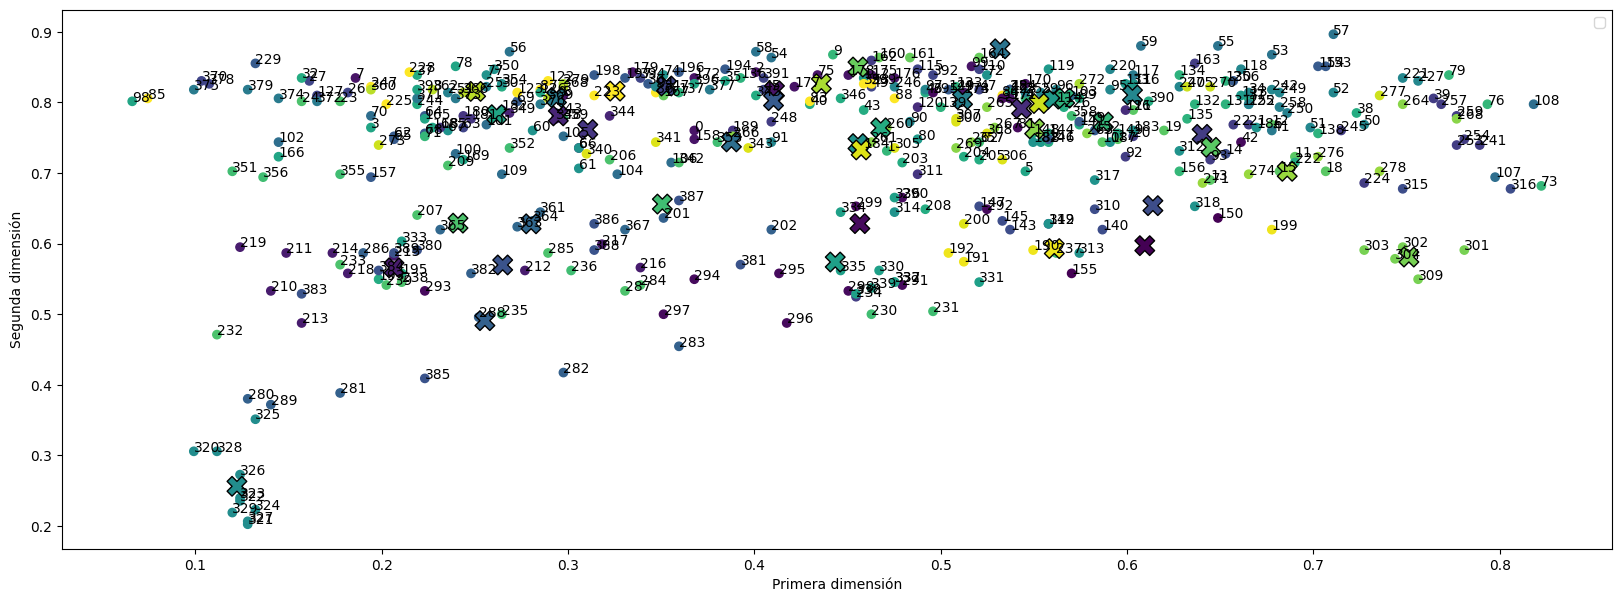

In [ ]:
# Este bloque es similar al anterior pero agregando color a cada sample en el scatter plot según la etiqueta asignada

fig, ax = plt.subplots(figsize = (20, 7))


# Hacemos un scatter plot de cada uno de los datos
ax.scatter(data[:, d1], data[:, d2], c=kmeans.labels_)
ax.scatter(centroids[:, d1], centroids[:, d2], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

## Por cada dato escribimos a qué instancia corresponde. Pueden comentar estas 2 lineas para ver mejor los colores
for i in range(data.shape[0]):
  ax.text(data[i, d1], data[i, d2], s = i)

ax.set_xlabel('Primera dimensión')
ax.set_ylabel('Segunda dimensión')

En este plot podemos ver que hay samples más alejados de la nube principal de puntos que tienen un color definido.

Dependiendo de las variables graficadas, la distribución podria ser diferente. Pruebe graficando otras dimensiones

Parecería ser que los clusters que encuentra no son los que queríamos que nos diera el modelo. Pero entonces, ¿qué son estos clusters? Mostremos las imágenes correspondientes a cada cluster.

In [ ]:
# Mostrar el resultado final
labels = kmeans.labels_

# Iniciamos un for con k=40 iteraciones
for i in range(40):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = len(index)                                                    # el número de samples en cada cluster
    this_faces = data[index].reshape(len(index),64,64)                  # reshapeamos los samples del i-ésimo cluster para que tenga el formato de una imagen de (64,64) pixeles
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_faces[i], cmap='bone')

Output hidden; open in https://colab.research.google.com to view.

Podemos ver que varios clusters son imágenes de una sola persona, lo cual esta muy bien. Pero en otros casos, no agrupa bien.

Revise los cluster y vea las similitudes.

A pesar de que en los primeros gráficos no se apreciaba una buena clusterización, pudimso ver que varios clusters si tienen imágenes de una misma persona.

#### [Método del codo](https://en.wikipedia.org/wiki/Elbow_method_(clustering)#:~:text=In%20cluster%20analysis%2C%20the%20elbow,number%20of%20clusters%20to%20use.)

Se hace un grafico de la función objetivo en función de la elección de k y se elige el k correspondiente al punto donde agregar un cluster más no baja significativamente el valor que queremos minimzar. Esto se puede detectar a ojo o utilizando algún paquete de python como ['kneed'](https://raghavan.usc.edu//papers/kneedle-simplex11.pdf)

In [ ]:
!pip install kneed            # instalamos el paquete con pip
from kneed import KneeLocator # importamos el paquete para detectar el codo

Vamos a aplicar el método KMeans al dataset de caras pero cambiando el número de clusters k y guardaremos el puntaje de la función objetivo, SSE (suma de los cuadrados de la distancia euclidea de cada cluster), en una lista

In [ ]:
# esto puede demorar un par de minutos

sse = [] # acá vamos a guardar el puntaje de la función objetivo

for k in range(1, 40):
  print(k)
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(data)
  sse.append(kkmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


Vamos a graficar SEE en función del número de clusters k



Text(0, 0.5, 'SSE')

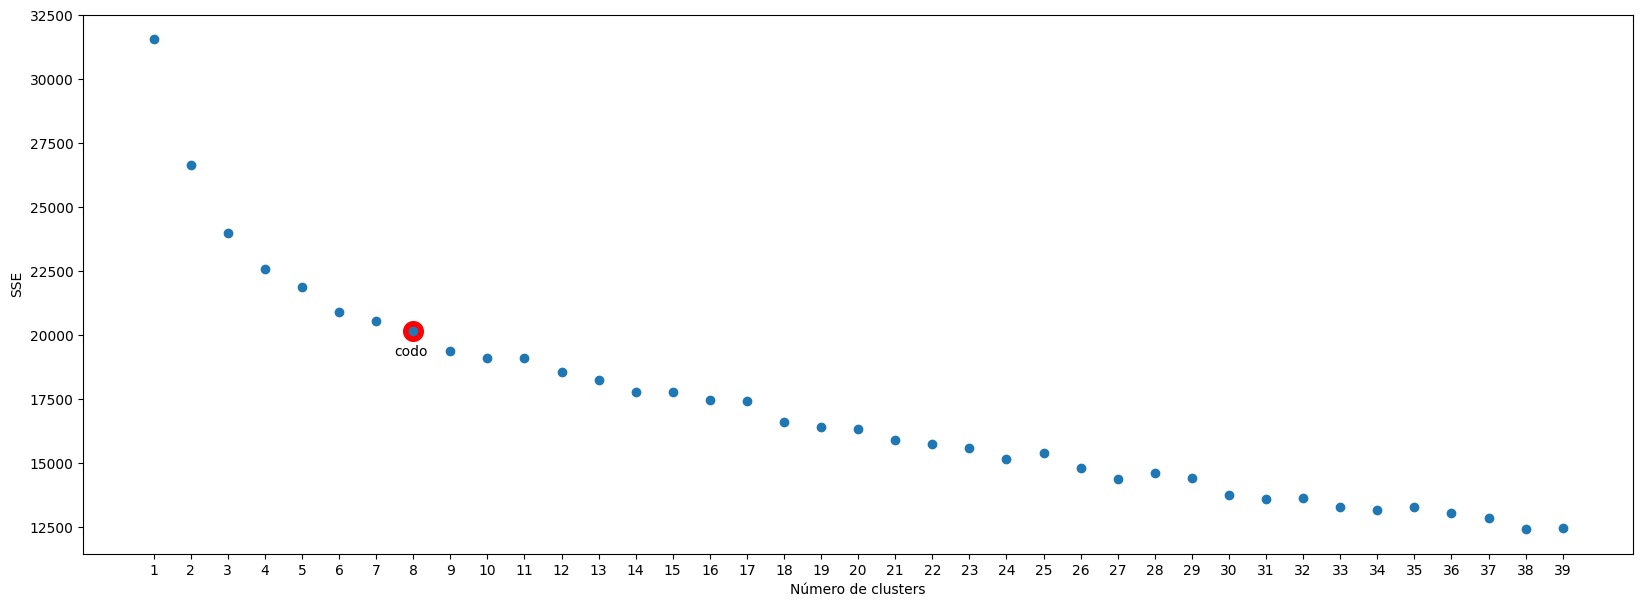

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# esta dos lineas las agrego para que se vea la elección de KneeLocator para el codo en este gráfico
ax.scatter(8, sse[7], color='red', s=200) # agregamos un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.5, sse[7]-1000, s="codo")       # agregamos un texto abajo para indicar qué representa el punto

# estas lineas son el grafico de SSEvsK
ax.scatter(range(1, 40), sse)
ax.set_xticks(range(1, 40))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("SSE")

En este plot podemos ver dos cosas:
1. SSE es monótonamente decreciente: al agregar un cluster la distancia entre todas las samples a los centroides siempre va a reducirse
2. A ojo distinguimos un codo entre k=7 y k=16 porque al agregar más clusters aumentamos la complejidad del modelo pero SEE disminuye en menor proporción.

Aun así, es muy dificil detectar el codo exactamente con la gráfica. No son muchos los casos donde con un gráfico podamos detectar el codo facilmente.

Usamos la función 'KneeLocator' para detectar el codo. Para ello le tenemos que pasar los valores de K, SEE, la forma de la fución (cóncava o convexa) y la dirección (creciente o decreciente)

In [ ]:
kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing")

print("El codo está en k =", kl.elbow)

El codo está en k = 9


## Resumen de funciones utilizadas e importantes.

KMeans

```
from sklearn.cluster import KMeans  # Importamos la clase KMeans

kmeans = KMeans(n_clusters=k)       # Crear el modelo con k-clusters

kmeans.fit(datos)                   # Ajustar el modelo a los datos

labels = kmeans.labels_             # Obtener las etiquetas de los k clusters para cada sample

centroids = kmeans.cluster_centers_ # Obtener las posiciones en el espacio de features del centro de los k clusters

sse = kmeans.inertia_               # Para obtener el valor de la función objetivo
```

Elección de k (si no lo conocemos de antemano):

Método del codo

```
!pip install kneed            # Instalamos el paquete kneed con pip install

from kneed import KneeLocator # Importamos la clase para detectar el codo

kl = KneeLocator(range(1, 40), sse, curve="convex", direction="decreasing") # Clase que sirve para calcular el codo en un gráfico de la función objetivo. Se le dan los puntos de la función con sus respectivos k, el tipo de curva (convexa o cóncava) y el sentido (creciente o decreciente)

kl.elbow                      # Devuelve el valor del codo
```

codigo maquina metricas de clustering

metodo elbow buscar la mejor configuracion del k y por q

entrega 3 .... 3 modelos k-means 3 clustering jerarquico

In [ ]:
# Importar las librerías necesarias
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


Índice de silueta para K=2: 0.5577
Índice de silueta para K=3: 0.7436
Índice de silueta para K=4: 0.7975
Índice de silueta para K=5: 0.6742
Índice de silueta para K=6: 0.5513
Índice de silueta para K=7: 0.5523
Índice de silueta para K=8: 0.4392
Índice de silueta para K=9: 0.3449
Índice de silueta para K=10: 0.3591


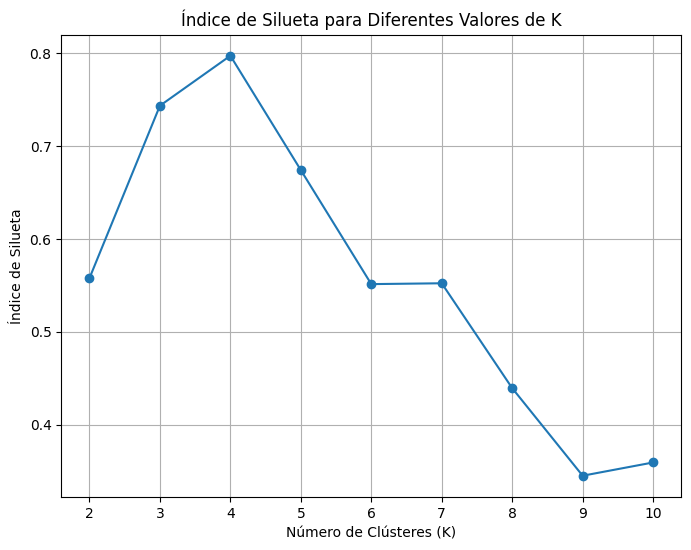

In [ ]:
# Generar un conjunto de datos de prueba (por ejemplo, usando make_blobs)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Estandarizar los datos (opcional, pero recomendado para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Función para calcular y graficar el índice de silueta para diferentes valores de K
def calcular_silueta(X):
    # Rango de posibles valores de K (número de clústeres)
    rango_K = range(2, 11)

    # Almacenar los resultados de los índices de silueta
    siluetas = []

    for k in rango_K:
        # Crear el modelo K-Means con K clústeres
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Predecir las etiquetas de clúster
        labels = kmeans.labels_

        # Calcular el índice de silueta
        silueta = silhouette_score(X, labels)
        siluetas.append(silueta)
        print(f"Índice de silueta para K={k}: {silueta:.4f}")

    # Graficar los resultados
    plt.figure(figsize=(8, 6))
    plt.plot(rango_K, siluetas, marker='o')
    plt.title('Índice de Silueta para Diferentes Valores de K')
    plt.xlabel('Número de Clústeres (K)')
    plt.ylabel('Índice de Silueta')
    plt.grid(True)
    plt.show()

# Llamar a la función para calcular y visualizar el índice de silueta
calcular_silueta(X_scaled)



**Analisis:**

Índice de silueta para K=4: 0.7975  

Análisis del Índice de Silueta para K = 4: 0.7975
El valor de 0.7975 es bastante alto, lo que sugiere que el algoritmo K-means con K = 4 ha logrado una buena agrupación, los resultados de este modelo son de buena calidad.

El índice de silueta de 0.7975 está bastante cerca de 1, lo que indica que los puntos dentro de cada clúster están muy bien agrupados y son  diferentes de los puntos en otros clústeres. Los puntos dentro de cada clúster son similares entre sí y están lo suficientemente alejados de otros clústeres.

El modelo K-means está realizando un buen trabajo en la identificación de los grupos, ya que el valor es cercano a  1.
 La alta puntuación en el índice de silueta implica que la segmentación de los datos en 4 grupos tiene sentido. Los puntos dentro de un grupo están bien definidos, lo que sugiere que la división de los datos en estos 4 clústeres es correctay representativa.



**Clustering jerarquico**

Dimensión original de los datos: (400, 4096)
Dimensión reducida de los datos: (400, 50)


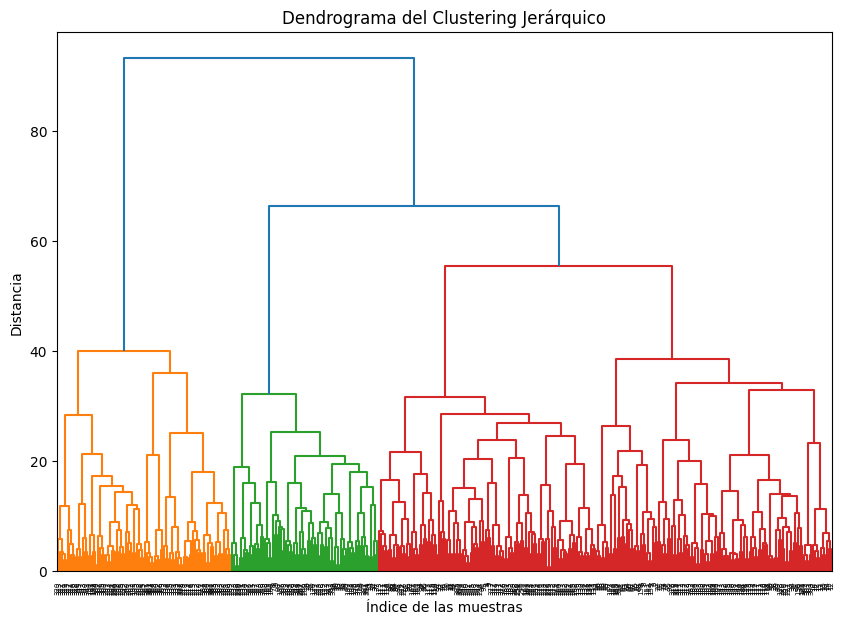

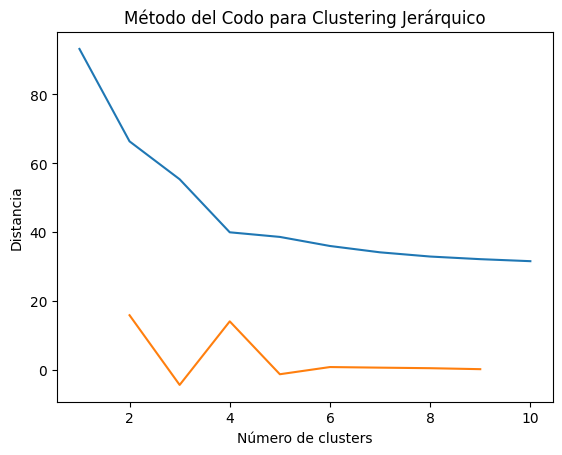


Número óptimo de clusters (Método del Codo): 2
Etiquetas de los clusters (primeros 10):
[0 0 0 0 0 0 0 0 0 0]
Silhouette Score: 0.1681


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 1. Cargar el dataset de Olivetti Faces y reducir la dimensionalidad
data, targets = fetch_olivetti_faces(return_X_y=True)
print(f"Dimensión original de los datos: {data.shape}")

# Reducir la dimensionalidad usando PCA
pca = PCA(n_components=50)  # Reducción a 50 componentes principales para conservar variabilidad
data_reduced = pca.fit_transform(data)
print(f"Dimensión reducida de los datos: {data_reduced.shape}")

# 2. Clustering Jerárquico y Dendrograma
# Calcular la matriz de distancias
dist_matrix = pdist(data_reduced)

# Aplicar el algoritmo de clustering jerárquico
Z = linkage(dist_matrix, 'ward')

# Visualización del dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice de las muestras')
plt.ylabel('Distancia')
plt.show()

# 3. Método del Codo para encontrar el número óptimo de clusters
# Análisis de la aceleración
last = Z[-10:, 2]  # Últimas 10 distancias
last_rev = last[::-1]  # Invertir para obtener el orden descendente
idxs = np.arange(1, len(last) + 1)

# Graficar la distancia y el método del codo
plt.plot(idxs, last_rev)
acceleration = np.diff(last, 2)  # Segunda derivada de las distancias
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.xlabel('Número de clusters')
plt.ylabel('Distancia')
plt.title('Método del Codo para Clustering Jerárquico')
plt.show()

# Determinar el número óptimo de clusters
k = acceleration_rev.argmax() + 2  # El codo está donde la aceleración es máxima
print(f"\nNúmero óptimo de clusters (Método del Codo): {k}")

# 4. Realizar el Clustering Jerárquico con el número óptimo de clusters
agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')#se obtuvieron las etiquetas de los clusters.
labels = agglo.fit_predict(data_reduced)

# Mostrar las etiquetas de los clusters
print(f"Etiquetas de los clusters (primeros 10):\n{labels[:10]}")

# 5. Evaluación del Silhouette Score
sil_score = silhouette_score(data_reduced, labels)
print(f"Silhouette Score: {sil_score:.4f}")


In [ ]:
# 2. Bucle para explorar diferentes porcentajes de varianza explicada
for varianza_objetivo in range(85, 96, 5):  # De 85% a 95% en pasos de 5
    # Reducción de la dimensionalidad usando PCA para diferentes porcentajes de varianza
    pca = PCA(n_components=varianza_objetivo / 100)  # Porcentaje de varianza
    data_reduced = pca.fit_transform(data)

    # Mostrar número de componentes necesarios
    print(f"\nNúmero de componentes para explicar el {varianza_objetivo}% de la varianza: {data_reduced.shape[1]}")



Número de componentes para explicar el 85% de la varianza: 40

Número de componentes para explicar el 90% de la varianza: 66

Número de componentes para explicar el 95% de la varianza: 123


Dimensión original de los datos: (400, 4096)

Usando 50 componentes principales:
  Número de componentes usados: 50


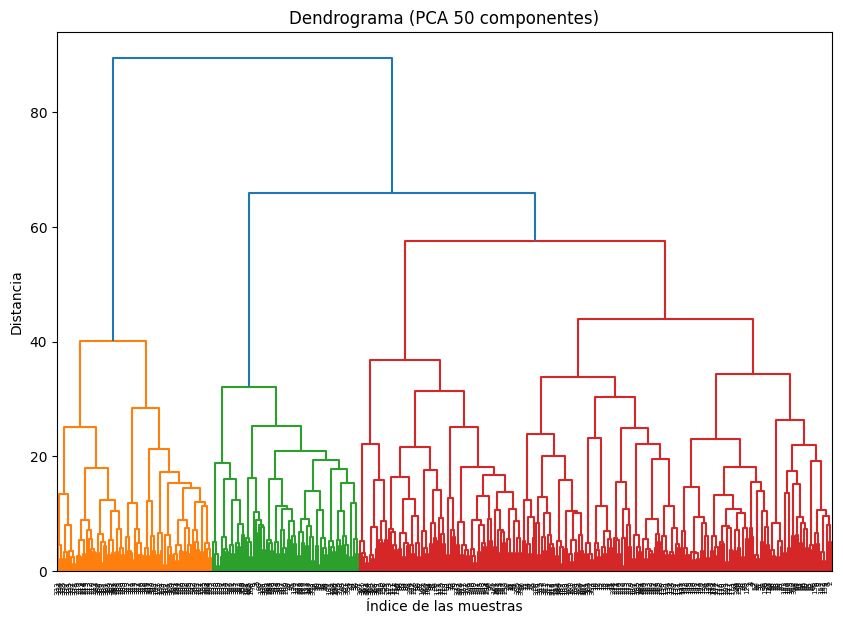

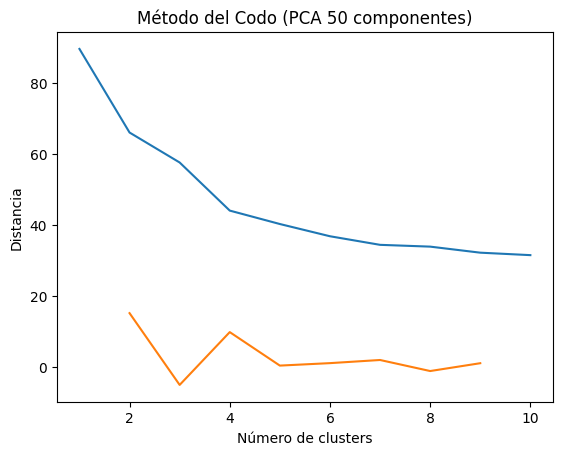

  Número óptimo de clusters (Método del Codo): 2
  Etiquetas de los clusters (primeros 10):
[0 0 0 0 0 0 0 0 0 0]
  Silhouette Score: 0.1560


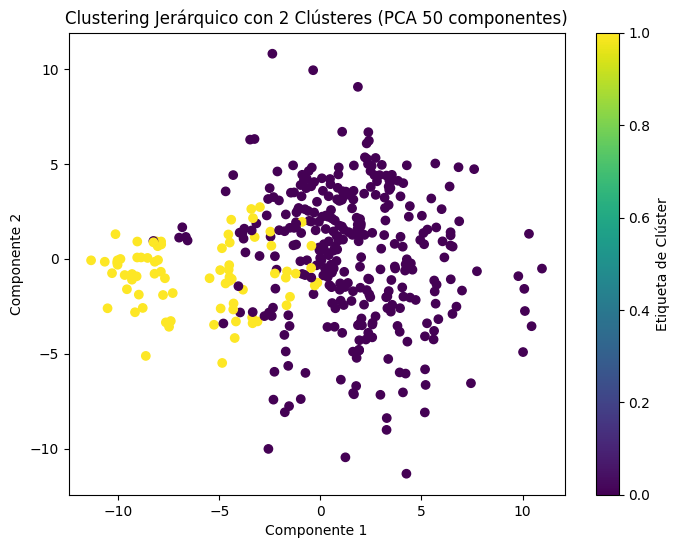


Usando 40 componentes principales:
  Número de componentes usados: 40


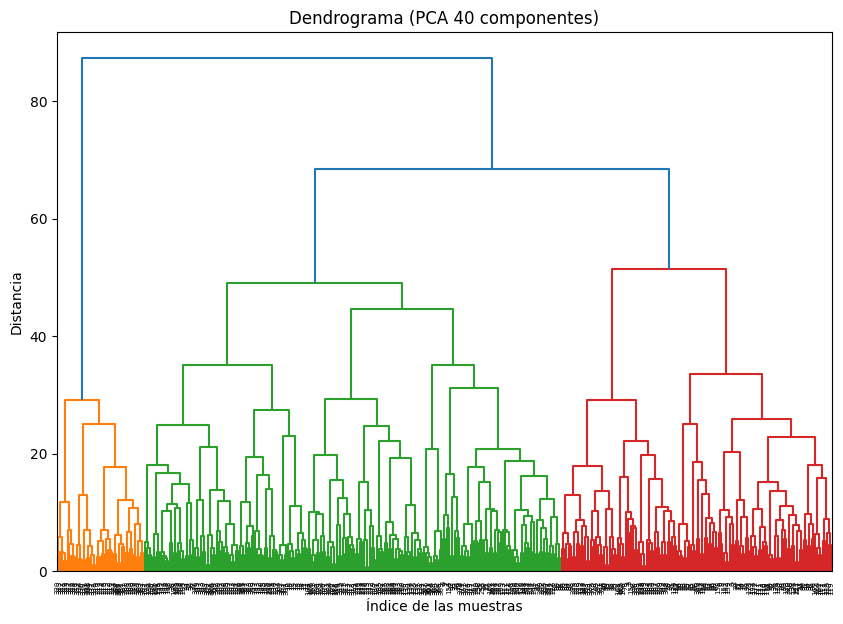

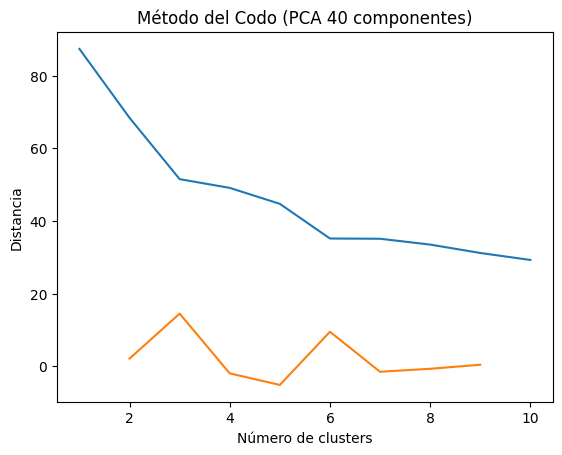

  Número óptimo de clusters (Método del Codo): 3
  Etiquetas de los clusters (primeros 10):
[0 2 0 0 2 0 0 0 0 2]
  Silhouette Score: 0.1077


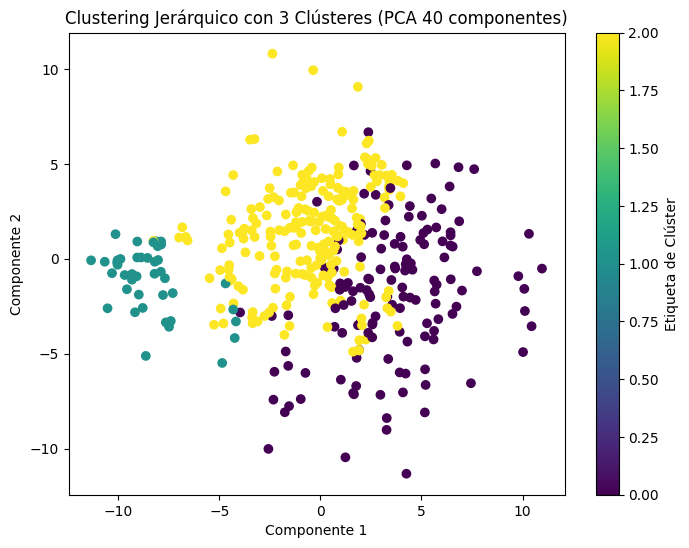


Usando 66 componentes principales:
  Número de componentes usados: 66


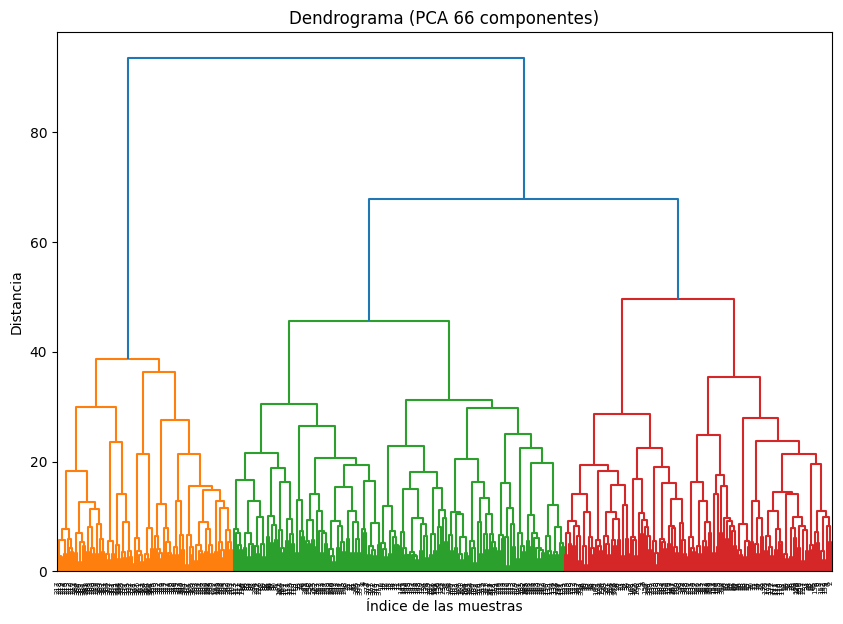

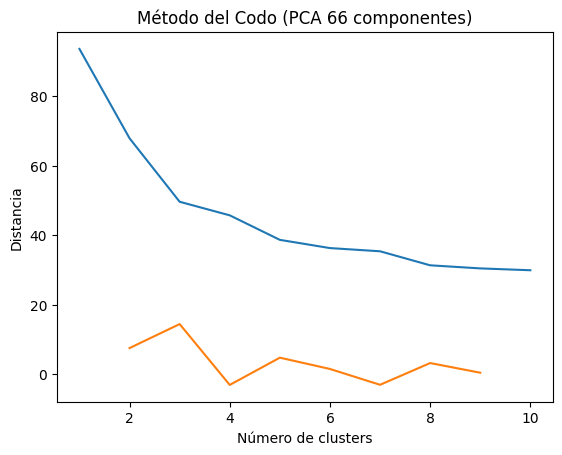

  Número óptimo de clusters (Método del Codo): 3
  Etiquetas de los clusters (primeros 10):
[0 2 0 0 2 0 0 0 0 2]
  Silhouette Score: 0.1116


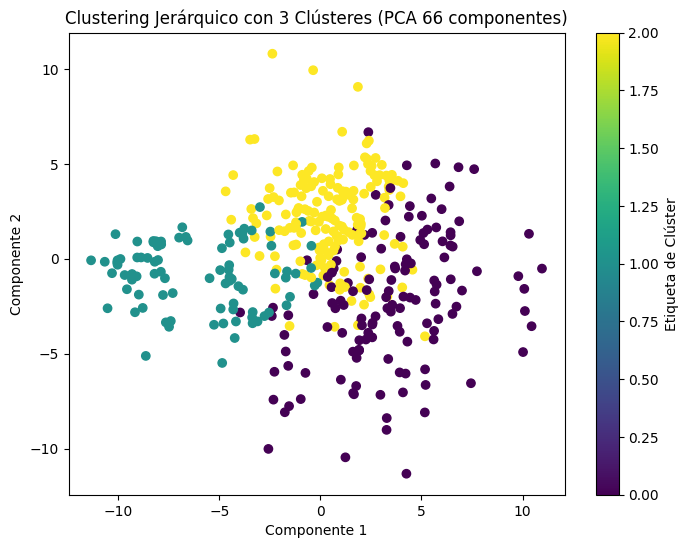


Usando 123 componentes principales:
  Número de componentes usados: 123


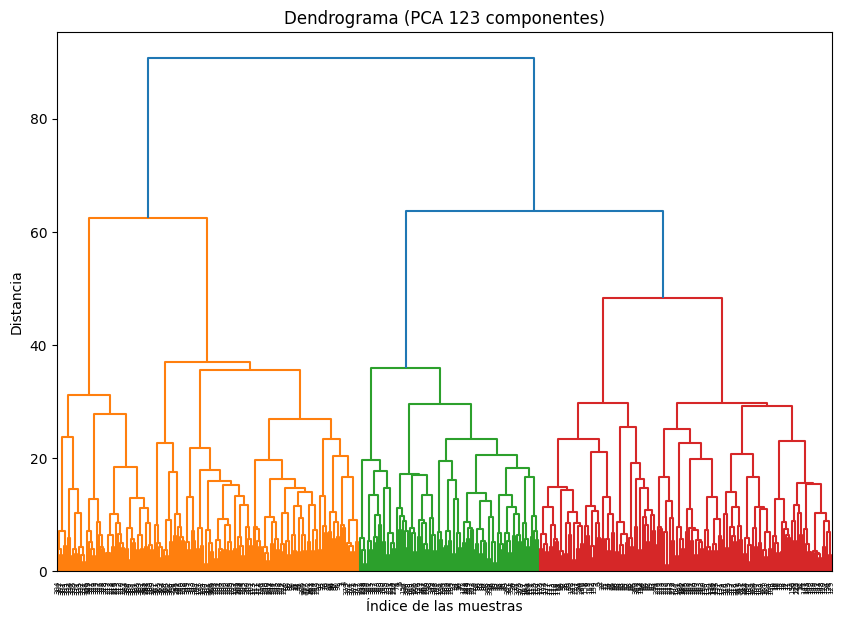

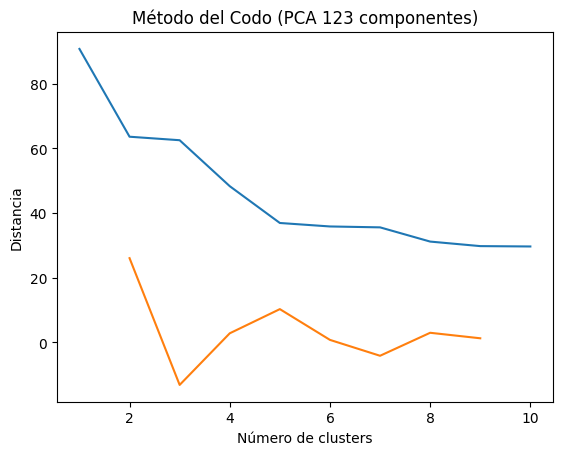

  Número óptimo de clusters (Método del Codo): 2
  Etiquetas de los clusters (primeros 10):
[0 1 0 0 1 0 0 0 0 1]
  Silhouette Score: 0.1239


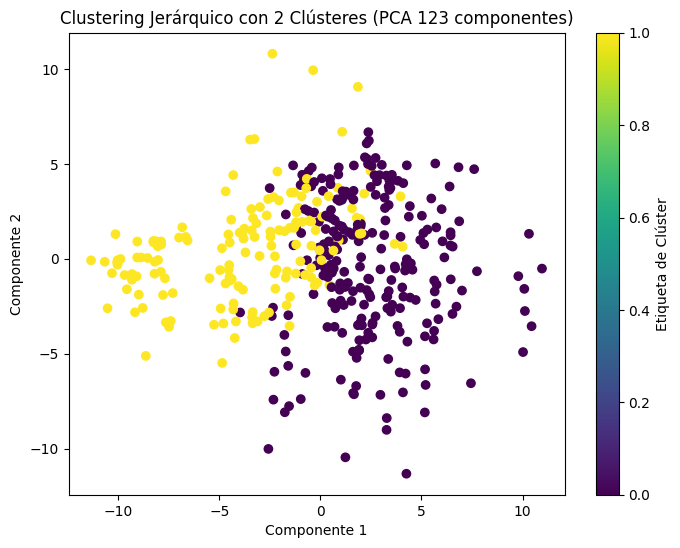

In [ ]:
# 1. Cargar el dataset de Olivetti Faces
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
data, targets = fetch_olivetti_faces(return_X_y=True)
print(f"Dimensión original de los datos: {data.shape}")

# Lista de componentes para probar
componentes_lista = [50, 40, 66, 123]

# Iterar sobre cada número de componentes
for varianza_objetivo in componentes_lista:
    print(f"\nUsando {varianza_objetivo} componentes principales:")

    # Reducción de la dimensionalidad usando PCA con el número de componentes especificado
    pca = PCA(n_components=varianza_objetivo)
    data_reduced = pca.fit_transform(data)

    # Mostrar número de componentes necesarios
    print(f"  Número de componentes usados: {data_reduced.shape[1]}")

    # Clustering Jerárquico y Dendrograma
    dist_matrix = pdist(data_reduced)  # Calcular la matriz de distancias
    Z = linkage(dist_matrix, 'ward')  # Aplicar el algoritmo de clustering jerárquico

    # Visualización del dendrograma
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(f'Dendrograma (PCA {varianza_objetivo} componentes)')
    plt.xlabel('Índice de las muestras')
    plt.ylabel('Distancia')
    plt.show()

    # Método del Codo para encontrar el número óptimo de clusters
    last = Z[-10:, 2]  # Últimas 10 distancias
    last_rev = last[::-1]  # Invertir para obtener el orden descendente
    idxs = np.arange(1, len(last) + 1)

    # Graficar la distancia y el método del codo
    plt.plot(idxs, last_rev)
    acceleration = np.diff(last, 2)  # Segunda derivada de las distancias
    acceleration_rev = acceleration[::-1]
    plt.plot(idxs[:-2] + 1, acceleration_rev)
    plt.xlabel('Número de clusters')
    plt.ylabel('Distancia')
    plt.title(f'Método del Codo (PCA {varianza_objetivo} componentes)')
    plt.show()

    # Determinar el número óptimo de clusters
    k = acceleration_rev.argmax() + 2  # El codo está donde la aceleración es máxima
    print(f"  Número óptimo de clusters (Método del Codo): {k}")

    # Realizar el Clustering Jerárquico con el número óptimo de clusters
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(data_reduced)

    # Mostrar las etiquetas de los clusters
    print(f"  Etiquetas de los clusters (primeros 10):\n{labels[:10]}")

    # Evaluación del Silhouette Score
    sil_score = silhouette_score(data_reduced, labels)
    print(f"  Silhouette Score: {sil_score:.4f}")

    # Graficar los clústeres
    plt.figure(figsize=(8, 6))

    # Graficar los dos primeros componentes principales
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', marker='o')

    plt.title(f'Clustering Jerárquico con {k} Clústeres (PCA {varianza_objetivo} componentes)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.colorbar(label='Etiqueta de Clúster')

    plt.show()


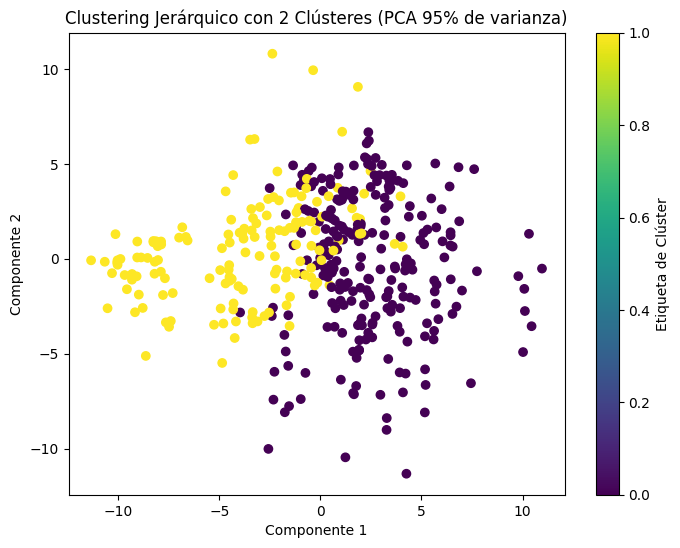

In [ ]:
  # 7. Graficar los clústeres
plt.figure(figsize=(8, 6))

    # Graficar los dos primeros componentes principales
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', marker='o')

plt.title(f'Clustering Jerárquico con {k} Clústeres (PCA {varianza_objetivo}% de varianza)')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar(label='Etiqueta de Clúster')

plt.show()

**Método del Silhouette**
Se evalua la calidad de los clusters generados con diferentes números de clusters.



Método del Silhouette:

- PCA (123 componentes):Número óptimo de clusters: 2.
- Etiquetas de los clusters (primeros 10): [0, 1, 0, 0, 1, 0, 0, 0, 0, 1] (dos grupos diferenciados).
- Silhouette Score: 0.1239, lo que indicauna calidad de clustering algo baja. Un Silhouette Score bajo sugiere que los puntos dentro de un cluster no están muy bien agrupados.
---------------------------------------
- PCA (66 componentes):
Número óptimo de clusters: 3.
Etiquetas de los clusters (primeros 10): [0, 2, 0, 0, 2, 0, 0, 0, 0, 2] (tres clusters identificados).
- Silhouette Score: 0.1116, lo que también refleja una calidad de clustering baja. El modelo tiene una capacidad limitada para separar bien los clusters, aunque en este caso hay tres clusters, lo que podría indicar una mayor complejidad en la estructura de los datos.
-----------------------------------------
- PCA (40 componentes):
Número óptimo de clusters: 3.
- Etiquetas de los clusters (primeros 10): [0, 2, 0, 0, 2, 0, 0, 0, 0, 2] es similar a PCA 66, y 3 clusters.
- Silhouette Score: 0.1077, lo que es incluso más bajo que en el caso anterior. Aunque el número de clusters es el mismo, la calidad de la separación entre ellos no es buena.
---------------------------------------
- PCA (50 componentes):
Número óptimo de clusters: 2.
Etiquetas de los clusters (primeros 10): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]. todos los puntos se agrupan en un solo cluster.
- Silhouette Score: 0.1560, lo que es el mejor resultado entre los casos analizados, pero sigue siendo relativamente bajo. Aunque se obtiene un Silhouette Score algo mayor que en otros casos, la falta de diversidad en los clusters, ya que todos etiquetados como el mismo grupo,  indica que el clustering no está capturando bien la estructura de los datos.


Se realiza un PCA para reduccion de dimensionalidad de componentes principales , para poder captar la mayor parte de la variabilidad de la imagenes.

-  Se análisis para diferentes porcentajes de varianza explicada con PCA (85%, 90%, 95%).
- PCA(40, 50, 66,123) se ve que los datos pueden no estar tan diferenciados cuando no se reduce la dimensionalidad.
ya que en PCA(123)se distribuyen en dos clusters (0 y 1) en los primeros 10 elementos , lo que indica que la mayor cantidad de componentes está permitiendo una separación más clara en los datos y una distribución es más diversa.




 El **dendrograma** muestra la estructura jerárquica del clustering. A medida que se combinan los puntos en grupos, las distancias entre los clusters aumentan.Este gráfico ayuda a visualizar cómo se agrupan las muestras, pero no da una respuesta directa sobre cuántos clusters elegir.

 **Método del Codo basado en la inercia**

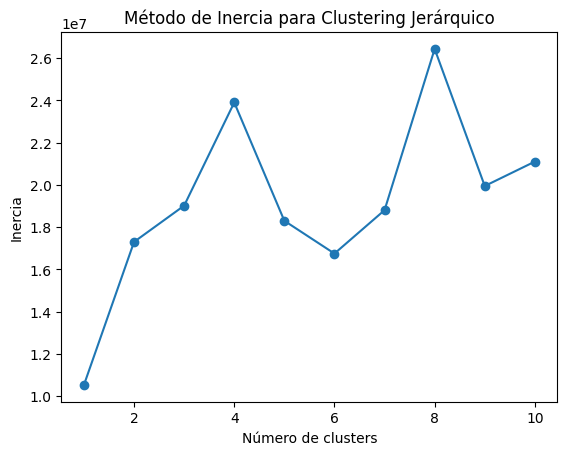

Número óptimo de clusters (Método del Codo): 8


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin_min

# Función para calcular la inercia
def calculate_inertia(X, labels):
    centroids, _ = pairwise_distances_argmin_min(np.array([X[labels == i].mean(axis=0) for i in np.unique(labels)]), X)
    inertia = sum((X[i] - centroids[labels[i]]) ** 2 for i in range(X.shape[0]))
    return inertia.sum()

# Calcular la inercia para diferentes números de clusters
inertias = []
for n_clusters in range(1, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X)
    inertia = calculate_inertia(X, labels)
    inertias.append(inertia)

# Graficar el método de inercia
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método de Inercia para Clustering Jerárquico')
plt.show()

# Calcular el "codo" (donde la disminución de inercia se desacelera)
# La idea es encontrar el punto donde la tasa de cambio de la inercia se reduce
inertia_diff = np.diff(inertias)
inertia_diff2 = np.diff(inertia_diff)  # Segunda derivada (cambio en la tasa de cambio)

# El codo está donde la segunda derivada es mínima (cambio más grande en la pendiente)
optimal_clusters = np.argmin(inertia_diff2) + 2  # +2 porque la segunda derivada tiene una longitud de n-2

# Imprimir el número óptimo de clusters
print(f"Número óptimo de clusters (Método del Codo): {optimal_clusters}")


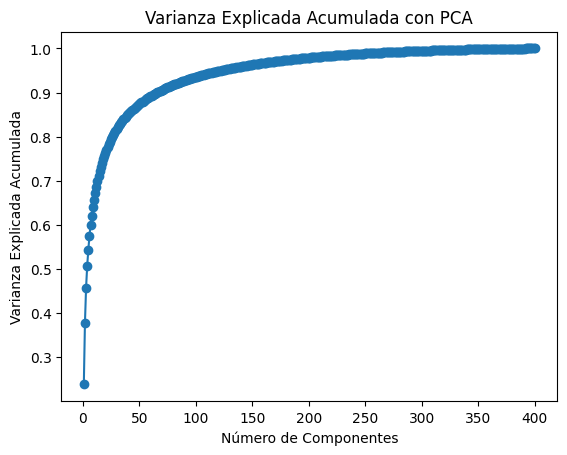

Número de componentes para el 95% de varianza: 123


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Asumimos que `data` es tu conjunto de datos
pca = PCA()
pca.fit(data)

# Varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Graficar la varianza explicada acumulada
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada con PCA')
plt.show()

# Selecciona el número de componentes que expliquen al menos el 95% de la varianza
n_components_95 = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95)
print(f'Número de componentes para el 95% de varianza: {n_components_95 + 1}')


Dimensión de los datos: (400, 4096)
Varianza explicada por 2 componentes: 0.3921881914138794
PCA con 2 componentes, Inercia: 105514.99365234375


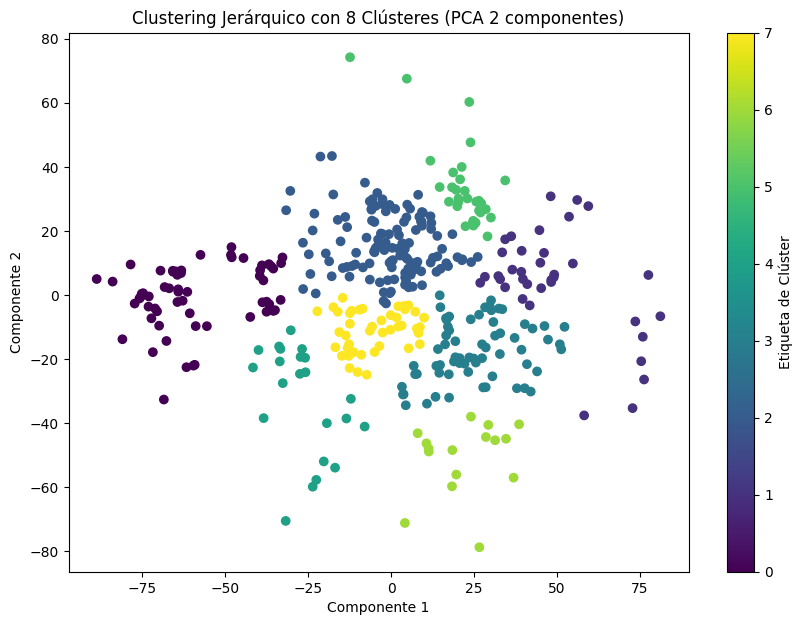

Varianza explicada por 40 componentes: 0.8506132364273071
PCA con 40 componentes, Inercia: 785433.482421875


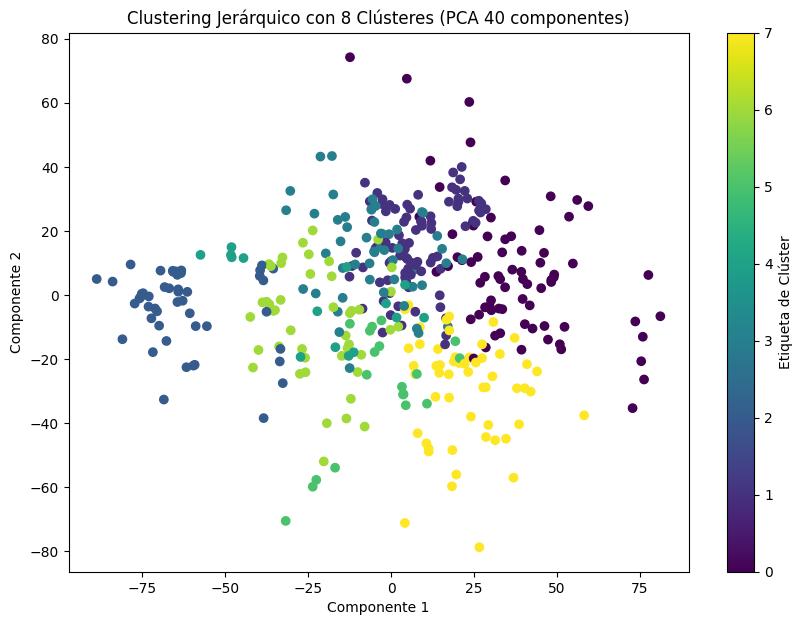

Varianza explicada por 50 componentes: 0.8740230798721313
PCA con 50 componentes, Inercia: 837091.17578125


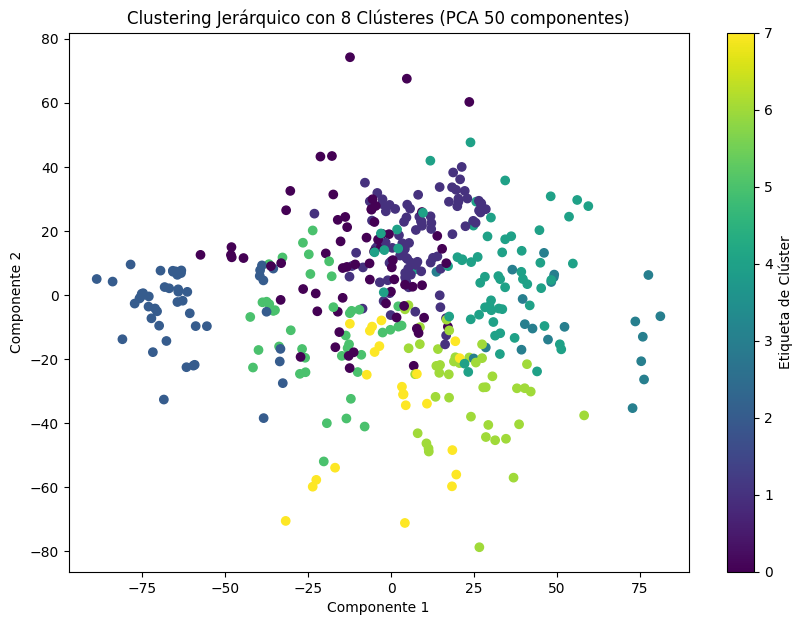

Varianza explicada por 66 componentes: 0.900444507598877
PCA con 66 componentes, Inercia: 865242.98046875


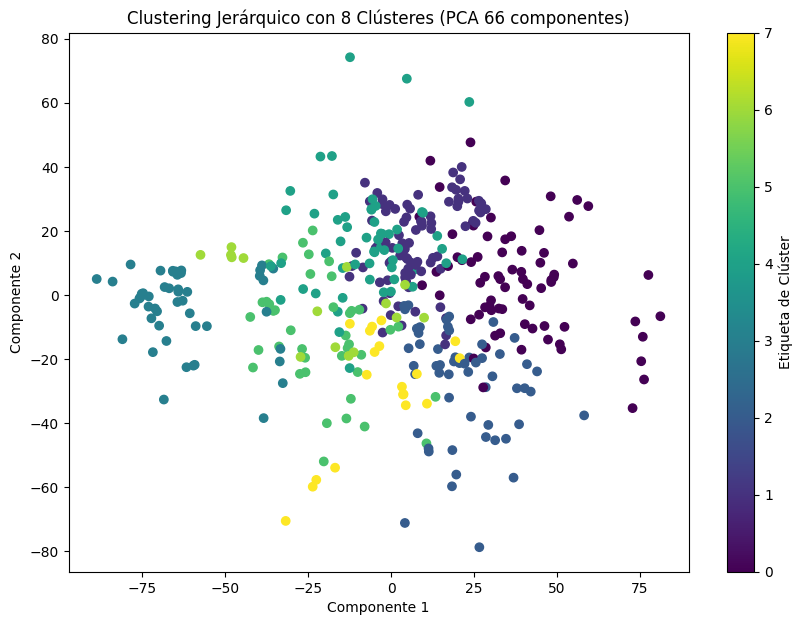

Varianza explicada por 123 componentes: 0.9501644372940063
PCA con 123 componentes, Inercia: 956901.33984375


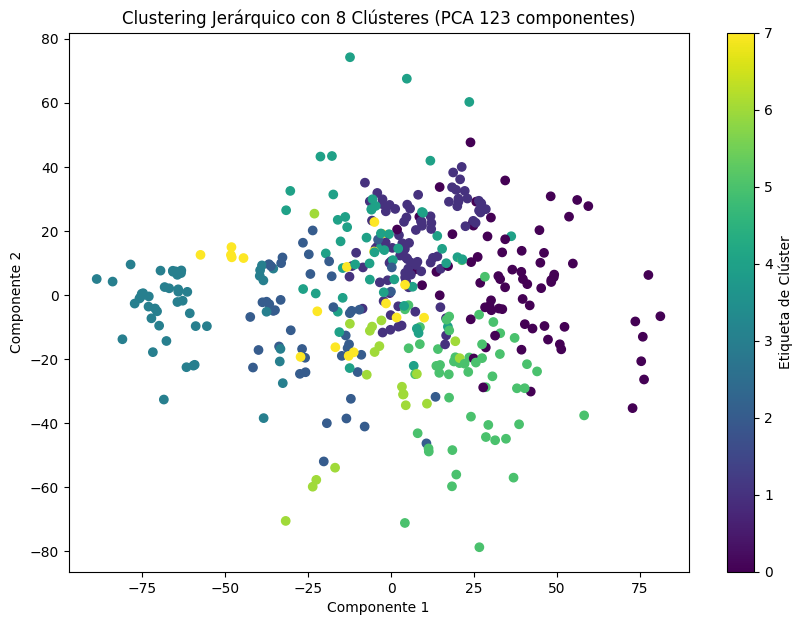

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
data, targets = fetch_olivetti_faces(return_X_y=True)
print('Dimensión de los datos: {}'.format(data.shape))

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Lista de números de componentes principales para PCA
n_components_list = [2, 40, 50, 66, 123]  # Puedes cambiar este rango si lo deseas

# Realizar el clustering con 8 clusters
n_clusters = 8

# Realizar PCA, clustering y análisis de inercia
for n_components in n_components_list:
    # 1. Reducir la dimensionalidad de los datos usando PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(data_scaled)  # Reducir la dimensionalidad

    # Verificar la varianza explicada por los componentes principales
    print(f"Varianza explicada por {n_components} componentes: {np.sum(pca.explained_variance_ratio_)}")

    # 2. Realizar el clustering jerárquico
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(X_reduced)

    # 3. Calcular la inercia (por la media de los puntos en cada clúster)
    inertia = 0
    for i in range(n_clusters):
        cluster_points = X_reduced[labels == i]  # Puntos en el clúster i
        cluster_center = np.mean(cluster_points, axis=0)  # Centroide del clúster
        inertia += np.sum((cluster_points - cluster_center) ** 2)  # Sumar las distancias al cuadrado de cada punto al centroide

    print(f'PCA con {n_components} componentes, Inercia: {inertia}')

    # 4. Graficar los datos con los clusters asignados (se usarán los dos primeros componentes para el gráfico)
    plt.figure(figsize=(10, 7))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(f'Clustering Jerárquico con {n_clusters} Clústeres (PCA {n_components} componentes)')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.colorbar(label='Etiqueta de Clúster')
    plt.show()


A medida que aumenta el número de componentes en PCA, la varianza explicada aumenta de forma constante. Al llegar a 123 componentes, se conserva un 95.02% de la varianza, lo que indica que la reducción de dimensionalidad mantiene una gran parte de la información original de los datos.

La inercia aumenta a medida que se incrementan los componentes. Esto puede indicar que agregar más componentes introduce más dispersión dentro de los clústeres en lugar de hacerlos más cohesionados

El método de clustering jerárquico, puede no ser tan efectivo en alta dimensión, ya que no está optimizado para manejar espacios de alta dimensionalidad.



***DBSCAN***

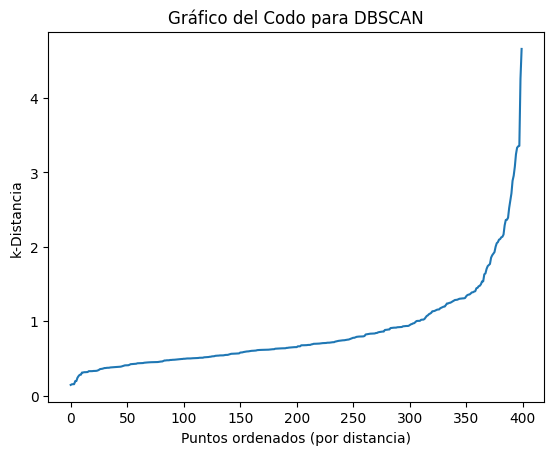

Número de clusters encontrados: 5
Número de puntos ruidosos: 121
Valor de epsilon utilizado: 0.9


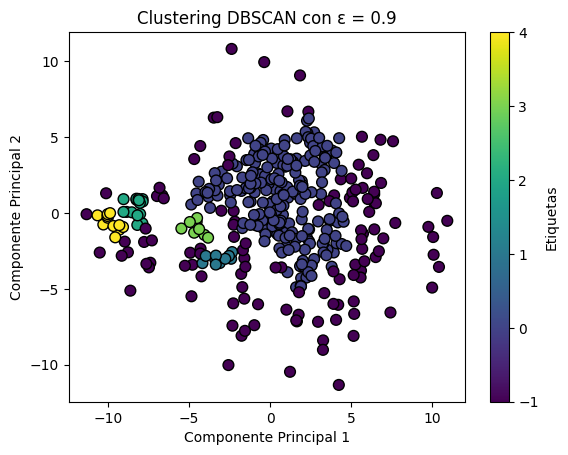

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# Cargar el conjunto de datos de las caras de Olivetti
data = fetch_olivetti_faces(shuffle=True, random_state=42)

# Los datos están en data.data y las etiquetas en data.target
X = data.data  # Características (pixeles de las imágenes)
y = data.target  # Etiquetas (personas)

# Reducir la dimensionalidad de las características a 2 usando PCA para poder graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Calcular k-vecinos más cercanos
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

# Ordenar las distancias
distances = np.sort(distances[:, 4], axis=0)

# Graficar el gráfico del codo para encontrar el valor óptimo de epsilon
plt.plot(distances)
plt.ylabel('k-Distancia')
plt.xlabel('Puntos ordenados (por distancia)')
plt.title('Gráfico del Codo para DBSCAN')
plt.show()

# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 0.9 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=8)
labels = dbscan.fit_predict(X_pca)

# Imprimir el número de clusters y los puntos ruidosos (etiqueta -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo ruido
num_ruidosos = list(labels).count(-1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos ruidosos: {num_ruidosos}")
print(f"Valor de epsilon utilizado: {epsilon_optimo}")

# Graficar resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering DBSCAN con ε = {epsilon_optimo}')
plt.colorbar(label='Etiquetas')
plt.show()


 Este valor de epsilon 0,9 es adecuado para separar los puntos en varios clusters bien definidos, pero permite que algunos puntos no sean suficientemente cercanos a otros para formar un cluster, por lo que los clasifica como ruidosos.

Número de clusters encontrados: 10
Número de puntos ruidosos: 149
Valor de epsilon utilizado: 0.8


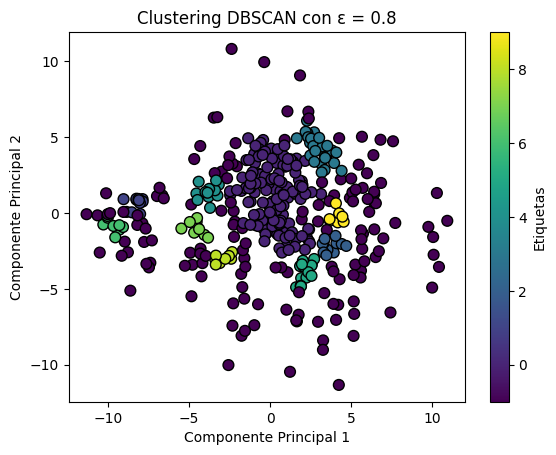

In [ ]:
# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 0.8 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=8)
labels = dbscan.fit_predict(X_pca)

# Imprimir el número de clusters y los puntos ruidosos (etiqueta -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo ruido
num_ruidosos = list(labels).count(-1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos ruidosos: {num_ruidosos}")
print(f"Valor de epsilon utilizado: {epsilon_optimo}")

# Graficar resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering DBSCAN con ε = {epsilon_optimo}')
plt.colorbar(label='Etiquetas')
plt.show()


 Este valor de epsilon 0,8 ha encontrado 10 clusters, lo que indica que un valor ligeramente menor de epsilon puede pe permitir una mayor granularidad en la segmentación de los datos, dividiendo los grupos en más clusters.También se observa un aumento en el número de puntos ruidosos a 149, se deduce que, al reducir epsilon, algunos puntos que antes se agrupaban en clusters ahora no están lo suficientemente cerca de otros puntos y son clasificados como ruido.se producen más clusters, pero también más puntos ruidosos.

Número de clusters encontrados: 1
Número de puntos ruidosos: 0
Valor de epsilon utilizado: 10


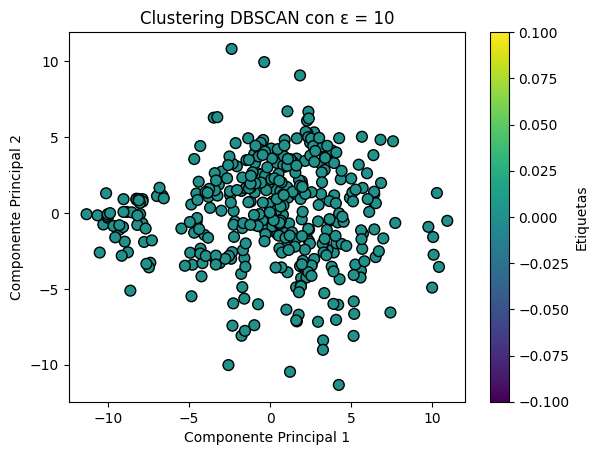

In [ ]:
# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 10 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=8)
labels = dbscan.fit_predict(X_pca)

# Imprimir el número de clusters y los puntos ruidosos (etiqueta -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo ruido
num_ruidosos = list(labels).count(-1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos ruidosos: {num_ruidosos}")
print(f"Valor de epsilon utilizado: {epsilon_optimo}")

# Graficar resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering DBSCAN con ε = {epsilon_optimo}')
plt.colorbar(label='Etiquetas')
plt.show()


Con epsilon 10, se ha encontrado solo un cluster y no ha clasificado ningún punto como ruidoso. Esto sucede porque el valor de epsilon es tan grande que casi todos los puntos están dentro de ese radio y, por lo tanto, se agrupan en un solo cluster.

Número de clusters encontrados: 1
Número de puntos ruidosos: 391
Valor de epsilon utilizado: 0.3


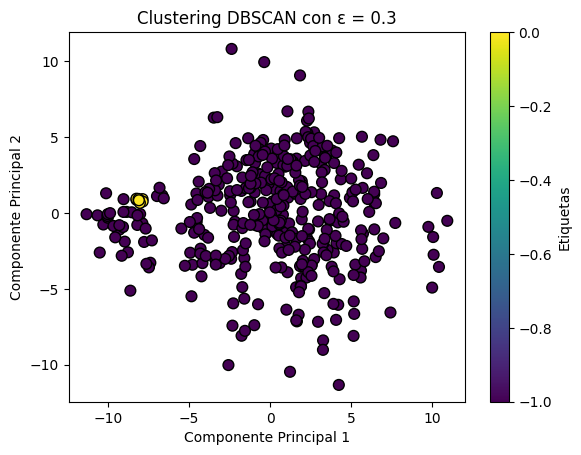

In [ ]:
# Valor de epsilon determinado por el gráfico del codo
epsilon_optimo = 0.3 # Ajusta este valor según el punto de inflexión de tu gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=8)
labels = dbscan.fit_predict(X_pca)

# Imprimir el número de clusters y los puntos ruidosos (etiqueta -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Excluyendo ruido
num_ruidosos = list(labels).count(-1)

print(f"Número de clusters encontrados: {num_clusters}")
print(f"Número de puntos ruidosos: {num_ruidosos}")
print(f"Valor de epsilon utilizado: {epsilon_optimo}")

# Graficar resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'Clustering DBSCAN con ε = {epsilon_optimo}')
plt.colorbar(label='Etiquetas')
plt.show()


Con epsilon 0.3, DBSCAN ha encontrado solo un cluster y clasificado un gran número de puntos 391 como ruidosos. Este valor de epsilon es bastante pequeño, lo que significa que solo los puntos muy cercanos entre sí se agruparán, mientras que la mayoría de los puntos estarán demasiado lejos de cualquier otro punto para ser considerados parte de un cluster.

Un valor de epsilon tan bajo no permite la formación de muchos clusters y genera una gran cantidad de puntos ruidosos. Ya que detecta grupos muy compactos,y es una segmentación demasiado restrictiva que no refleja bien la estructura de los datos.

epsilon 0.9 parece ser un buen valor, ya que proporciona una segmentación razonable con un número moderado de clusters y puntos ruidosos. Valores demasiado pequeños o demasiado grandes para epsilon tienden a llevar a una segmentación con muy pocos o demasiados cluster.